Simple model for effects of turbulence
===============================

The code below uses ComPat.series to calculate a mimic of the output of a turbulence code.

This is then run as a series of steps (each involving 100 "time-steps"), and the values of the mean and standard deviation are calculated for each step.  At the same time running exponential averages are calculated for value and the value squared, and these are then used to calculate the (averaged) mean and standard deviation.

In [ ]:
#%matplotlib inline
%matplotlib notebook
import numpy as np
import matplotlib.pylab as plt
import ComPat
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

Typical output from randomize is shown below.
- the overshoot period is from 0 to 10
- the normal period is from 10 until 190
- averaging is done from 50 onwards
- the initial value is 0.0
- the overshoot value is 1.5
- the normal value is 1.0
- 10% noise is imposed in both the overshoot and normal period
- the time constant for attempting to return to the target value is 10 iterations for both periods

<IPython.core.display.Javascript object>


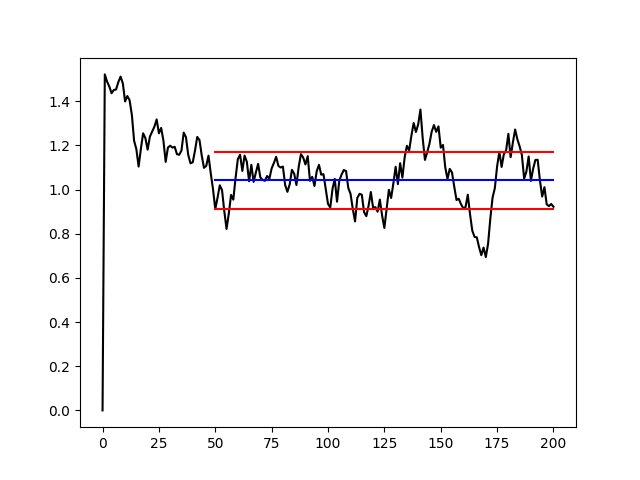

In [10]:
plt.figure()
x, mean, std, xrange, x1, x2 = ComPat.randomize(10, 190, 50, 0.0, 1.5, 1.0, 0.1, 0.1, 10, 10, 0.0, 0.0, 0.001)
plt.plot(x,'k')
plt.plot(xrange,[mean-std,mean-std],'r')
plt.plot(xrange,[mean,mean],'b')
plt.plot(xrange,[mean+std,mean+std],'r');

<IPython.core.display.Javascript object>


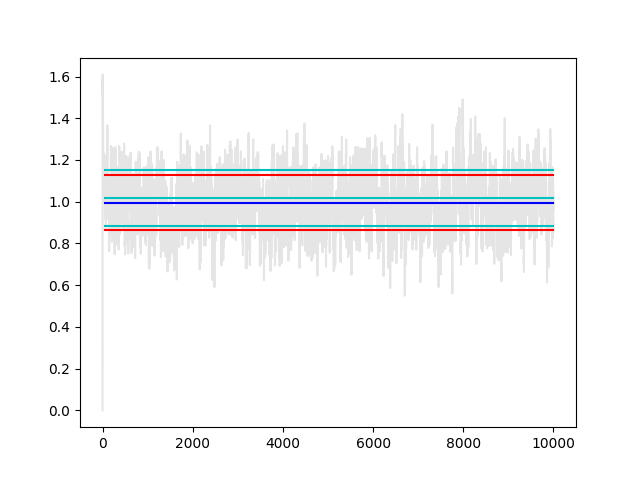

In [13]:
plt.figure()
x, mean, std, xrange, x1, x2 = ComPat.randomize(10, 9990, 50, 0.0, 1.5, 1.0, 0.1, 0.1, 10, 10, 0.0, 0.0, 0.001)
plt.plot(x,'k',alpha=0.1)
plt.plot(xrange,[mean-std,mean-std],'r')
plt.plot(xrange,[mean,mean],'b')
plt.plot(xrange,[mean+std,mean+std],'r')
plt.plot(xrange, [x1,x1],'c')
plt.plot(xrange, [x1+np.sqrt(x2-x1**2),x1+np.sqrt(x2-x1**2)],'c')
plt.plot(xrange, [x1-np.sqrt(x2-x1**2),x1-np.sqrt(x2-x1**2)],'c');

In [14]:
mean, std, x1, x2, np.sqrt(x2-x1**2)

(0.9958060010009412,
 0.13136899532119642,
 1.0170920547186004,
 1.05229590860623,
 0.13349030239880938)

In [15]:
s2 = 0.2
s3 = 0.2
d2 = 10
d3 = 10

N1 = 10
N2 = 90
N3 = 30

<IPython.core.display.Javascript object>


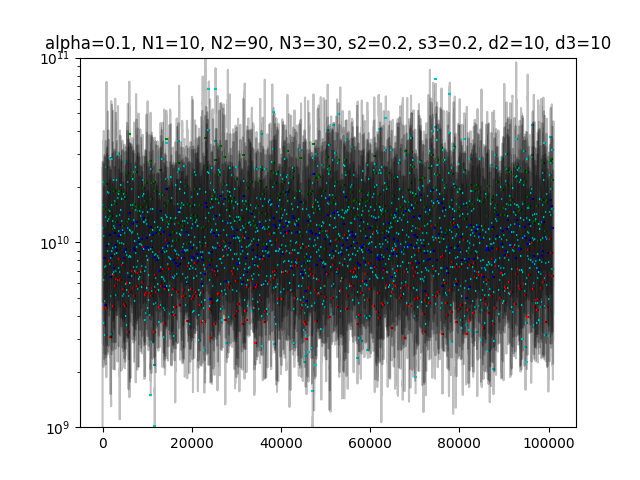

<IPython.core.display.Javascript object>


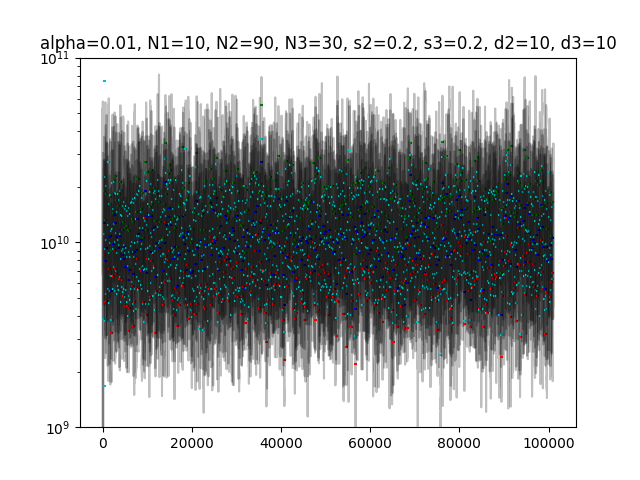

<IPython.core.display.Javascript object>


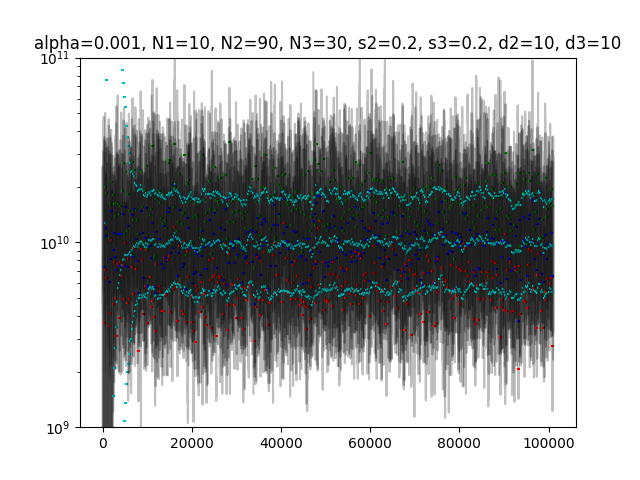

<IPython.core.display.Javascript object>


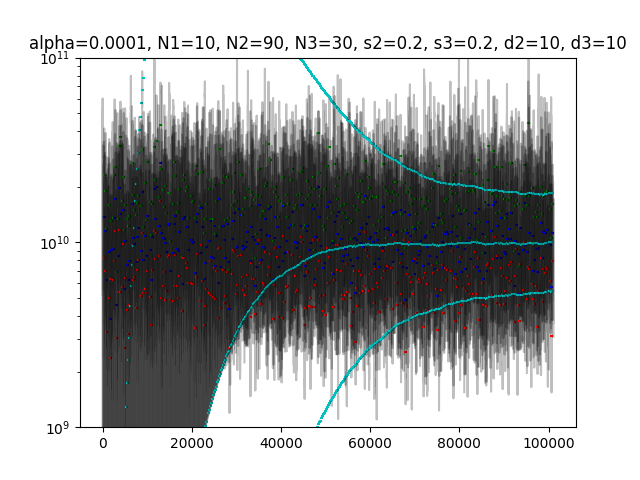

In [16]:
X1 = {} ; X2 = {}
for alpha in [0.1, 0.01, 0.001, 0.0001]:
    plt.figure()
    X1[alpha], X2[alpha] = ComPat.series (alpha, N1, N2, N3, s2, s3, d2, d3)
    plt.ylim(1e9,1e11)

<IPython.core.display.Javascript object>


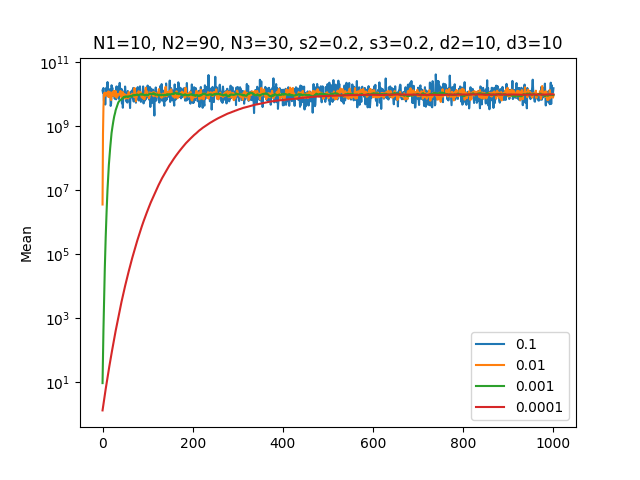

In [17]:
plt.figure()
plt.clf()
for k, v in X1.items():
    plt.plot(10**np.array(v), label=k)
plt.legend(loc=0)
plt.yscale('log'); plt.ylabel('Mean')
plt.title('N1=%s, N2=%s, N3=%s, s2=%s, s3=%s, d2=%s, d3=%s' % (N1, N2, N3, s2, s3, d2, d3));

<IPython.core.display.Javascript object>


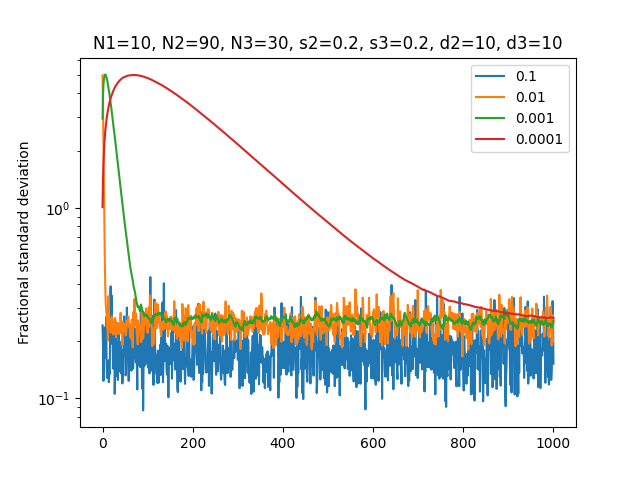

In [18]:
plt.figure()
plt.clf()
for k in X1.keys():
    plt.plot((np.sqrt(X2[k]-np.array(X1[k])**2)), label=k)
plt.legend(loc=0)
plt.yscale('log'); plt.ylabel('Fractional standard deviation')
plt.title('N1=%s, N2=%s, N3=%s, s2=%s, s3=%s, d2=%s, d3=%s' % (N1, N2, N3, s2, s3, d2, d3));